In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
#prepare Data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape 


In [9]:
#Define Model
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        self.lin = nn.Linear(input_dim, output_dim)
        
    
    def forward(self, x):
        return self.lin(x)
    

input_size, output_size = n_features, 1
model = LinearRegression(input_size, output_size)


In [12]:
#Define Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
#Training The Model
epochs = 100

for epoch in range(epochs):
    #forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    #print details
    if epoch%5 == 0:
        print(f'epoch {epoch+1}: loss={loss.item():.4f}')
        
    
    


epoch 1: loss=5647.6680
epoch 6: loss=4710.1489
epoch 11: loss=4059.2056
epoch 16: loss=3505.8240
epoch 21: loss=3035.2444
epoch 26: loss=2634.9634
epoch 31: loss=2294.3867
epoch 36: loss=2004.5336
epoch 41: loss=1757.7874
epoch 46: loss=1547.6864
epoch 51: loss=1368.7460
epoch 56: loss=1216.3109
epoch 61: loss=1086.4271
epoch 66: loss=975.7352
epoch 71: loss=881.3809
epoch 76: loss=800.9374
epoch 81: loss=732.3411
epoch 86: loss=673.8375
epoch 91: loss=623.9329
epoch 96: loss=581.3565


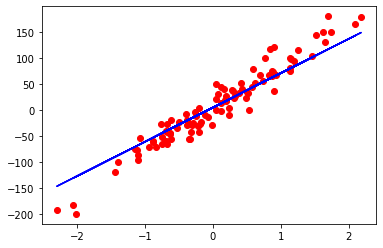

In [16]:
#Test The Model

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()